## Project Outline
- We have been tasked to create a team allocation simulator using algorithms that will organize students into well-rounded groups for a data science course. 
- Students from different tutorial group should not be grouped together

### Flowchart

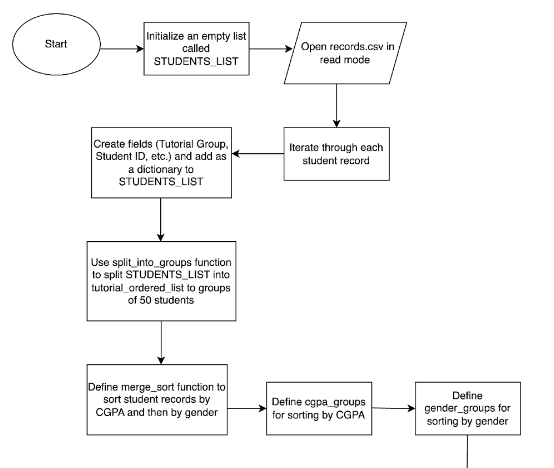

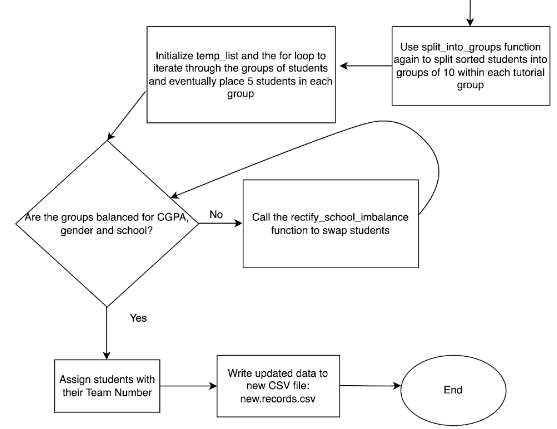

--------

# Basic Requirement

### Appending Information from CSV
Read through the csv file

Create a student list

Import the information into the list

In [7]:
# Initialize Global Variable STUDENTS_LIST and append the information from the CSV File 
STUDENTS_LIST = []
with open('records.csv', 'r') as records:
    next(records) # Start from second line onwards
    for student in records:
        tutorial_group, student_id, school, name, gender, cgpa = student.strip().split(',')
        STUDENTS_LIST.append({ #Adding each student into dictionary
            'Tutorial Group': tutorial_group,
            'Student ID': student_id,
            'Name': name,
            'School': school,
            'Gender': gender,
            'CGPA': float(cgpa)
        })

### Split Into Tutorial Groups
We split the students into groups based on the size of their tutorial class

Assign the new ordered lists into a new list called "tutorial_ordered list"

In [8]:
tutorial_ordered_list = []
def split_into_groups(records_list, group_size):
        record = []
        for i in range(0, len(records_list), group_size):
                record.append(records_list[i:i + group_size])
        return record
    
#Spliting the groups based on tutorial            
tutorial_ordered_list = split_into_groups(STUDENTS_LIST, 50)

### Merge Sort Algorithm
Merge sort is a divide-and-conquer sorting algorithm that recursively splits a list into halves until each sublist has one element. 

It then merges these sublists back together in sorted order using our key, which is by the student's CGPA

In [9]:
def merge_sort(list_to_sort, key= lambda x: x):
    list_len=len(list_to_sort) #calc len of list


    if list_len<=1:
        return list_to_sort #return the list if its length is 1 or less

    left_half=merge_sort(list_to_sort[:list_len//2], key) #call mergesort on left half (will recurse down the left tree)
    right_half=merge_sort(list_to_sort[list_len//2:], key) #call mergesort on right half (only when left tree is left with 1 element)


    return merge(left_half, right_half, key) #calls merge func which returns a sorted list



def merge(left_list, right_list, key):
    temp=[] #temp list that stores sorted items


    while left_list and right_list: #while both arr are not empty
        if key(left_list[0]) <= key(right_list[0]): # if key of the 1st element in left arr is less than that of right arr
            temp.append(left_list[0]) #append to temp_list
            left_list.pop(0) #remove this appended item
        else:
            temp.append(right_list[0])
            right_list.pop(0)


    if left_list: #if there is still elements in one of the arr, extend them to temp_list since the remaining elements are alr sorted
        temp.extend(left_list)


    if right_list:
        temp.extend(right_list)


    return temp #return the sorted list to merge_sort

### Sorting And Adding Into Groups
Helper function to sort the list

In [10]:
#sort by GPA first
def cgpa_groups(student):
        return student["CGPA"]

#Sort by gender next
def gender_groups(student):
            return student["Gender"]

### Check Balance Function And Swapping Groups
Helper function to debug and check balance

In [11]:
#This function is only used to visualize the students grouping
def check_balance(category, temp_list):
    if category == 'CGPA':
        for group in range(10):
            total_sum = 0
            for member in range(5):
                total_sum += temp_list[group][member][category]
            print(total_sum / 5)
    else:
        correct = True
        for group in range(10):
            counter = {}
            for member in range(5):
                category_value = temp_list[group][member][category]
                if category_value in counter:
                    counter[category_value] += 1
                else:
                    counter[category_value] = 1
            for key, count in counter.items():
                if category == 'School' and count >= 3:
                    correct = False 
                if category == 'Gender':
                    print(key, count)
        if correct == True and category == 'School':
            print('correct')
        elif correct == False and category == 'School': 
            print('wrong')

### Rectify School Imbalances
1. Function to rectify the imbalance of school

2. Identify the school of the group members in every group

3. Identify those groups with majority of the students from same school

4. Swap the students out with somebody who is not from the same school with a suitable group

5. Fix the anomalities

6. Check that the school is balance, if not the loop continues






In [12]:
def rectify_school_imbalance(temp_list): 
        Imbalance_case = []
        school_of_each_group = [[], [], [], [], [], [], [], [], [], []]
        for group in range(10):
            for member in range(5):
                school_of_each_group[group].append(temp_list[group][member]['School'])

        school_list = ['ADM', 'ASE', 'CCDS', 'CCEB', 'CEE', 'CoB (NBS)', 'CoE', 'EEE', 'HASS', 'LKCMedicine', 'MAE', 'MSE', 'NIE', 'SBS', 'SoH', 'SPMS', 'SSS', 'WKW SCI']
        
        # Categorising into differeent school for each group
        for group in range(10):
            school_counts = {}
            for school in school_of_each_group[group]:
                if school in school_counts:
                    school_counts[school] += 1
                else:
                    school_counts[school] = 1

            #check for imbalance and swap
            for school, count in school_counts.items():
                if count >= 3: 
                    Imbalance_case.append(school_of_each_group[group])        
                    #swap begins here
                    for target_group in range(10): #iterate through school_of_each_group
                        if target_group != group: #not swapping with itself 
                            for target_member, target_school in enumerate(school_of_each_group[target_group]):
                                if target_school != school: #ensure sch swapped is diff
                                    # swap a member from the imbalanced group with the target group
                                    need_repeat = True 
                                    for member, member_school in enumerate(school_of_each_group[group]):#iterate thru problem grp till we find the sch to swap
                                        if need_repeat == False:
                                            break
                                        if member_school == school and temp_list[target_group][target_member]['Gender'] == temp_list[group][member]['Gender']:
                                            # Swap the students between groups
                                            temp_list[group][member], temp_list[target_group][target_member] = temp_list[target_group][target_member], temp_list[group][member]
                                            # Update school_of_each_group to reflect the swap
                                            school_of_each_group[group][member], school_of_each_group[target_group][target_member] = school_of_each_group[target_group][target_member], school_of_each_group[group][member]
                                            school_counts[school] -= 1    
                                            need_repeat = False
                                                        
                                                                                
                                            #check if both swapped is fine and fixing anomalies
                                            grouping = [target_group, group]
                                            # Categorise the groups first 
                                            for diff_group in grouping:
                                                if need_repeat == True:
                                                    break
                                                school_target_count = {}
                                                for schools in school_of_each_group[diff_group]:
                                                    if schools in school_target_count:
                                                        school_target_count[schools] += 1
                                                    else:
                                                        school_target_count[schools] = 1
                                                #swap back if necessary =
                                                for schools, counts in school_target_count.items():
                                                    if counts >= 3 and schools == school and diff_group == group: 
                                                        need_repeat = True
                                                        break
                                                    elif counts >= 3: #if inbalanced we swap
                                                        temp_list[target_group][target_member], temp_list[group][member] = temp_list[group][member], temp_list[target_group][target_member]
                                                        school_of_each_group[target_group][target_member], school_of_each_group[group][member] =  school_of_each_group[group][member], school_of_each_group[target_group][target_member]
                                                        school_counts[school] += 1
                                                        need_repeat = True 
                                            
                                            # Break after swap to avoid multiple swaps at once
                                            break
                                        # Check if imbalance is resolved after each swap\

                                if school_counts[school] < 3:
                                    break #break inner loop 
                            if school_counts[school] < 3:
                                break #break outer loop

### Running The Sorting And Swapping

1. Call the function and execute the sorting

2. Initialize a grouping list, which split each tutorial group into 5 tiers

3. Grab one member from each tier (1st from each tier form first group, 2nd from each tier form second group, etc)

### Illustration of the grouping process

After the sorting, each tutorial group should looks like this:

| Member | CGPA          | Gender |
|---     |---            |---     |
| 1      | Lowest        | Female |
| 2      | 2nd Lowest    | Female |
| 3      | 3rd Lowest    | Female |
| ...    |...            | ...    |
| 24     | 2nd Highest   | Female |
| 25     | Highest       | Female |
| 26     | Lowest        | Male   |
| 27     | 2nd Lowest    | Male   |
| ...    |...            | ...    |
| 49     | 2nd Highest   | Male   |
| 50     | Highest       | Male   |


The groupings are as shown:


| TG       | Tier 1 | Tier 2 | Tier 3 | Tier 4 | Tier 5 |
|----------|--------|--------|--------|--------|--------|
| Group 1  | Female | Female | Female |  Male  |  Male  |
| Group 2  | Female | Female | Female |  Male  |  Male  |
| Group 3  | Female | Female | Female |  Male  |  Male  |
| Group 4  | Female | Female | Female |  Male  |  Male  |
| Group 5  | Female | Female | Female |  Male  |  Male  |
| Group 6  | Female | Female | Male   |  Male  |  Male  |
| Group 7  | Female | Female | Male   |  Male  |  Male  |
| Group 8  | Female | Female | Male   |  Male  |  Male  |
| Group 9  | Female | Female | Male   |  Male  |  Male  |
| Group 10 | Female | Female | Male   |  Male  |  Male  |

4. Insert the members into temp_list

5. Call the function to rectify the school imbalance

6. Number the group member with a for loop

In [13]:
# run everything 
for individual_tutorial in tutorial_ordered_list: #can slice the ordered list here

    sorted_individual_tutorial=merge_sort(individual_tutorial, key=cgpa_groups)
    sorted_individual_tutorial.sort(key=gender_groups) #then sort by gender

    #Algorithm to add all into their groups 
    grouping_list = split_into_groups(sorted_individual_tutorial, 10) #Split into 5 groups of 10
    temp_list = [[], [], [], [], [], [], [], [], [], []]
    for group in range(10):
        for person in range(5):
            temp_list[group].append(grouping_list[person][group]) 

    rectify_school_imbalance(temp_list)
    
    #adding team number
    n = 1
    for Team in temp_list:
        for member in Team:
            member['Team Number'] = n
        n += 1

    check_balance('School', temp_list)
    #check_balance('CGPA', temp_list)
    #check_balance('Gender', temp_list)

correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct


### Writing The New Record

Write the new data into a new file called "new.record.csv"

In [14]:
with open('new.record.csv', 'w') as new_record:
    new_record.write("Tutorial Group,Student ID,School,Name,Gender,CGPA,Team Number\n")
    for individual_tutorial in tutorial_ordered_list:
        for individual_member in individual_tutorial:
            new_record.write(f"{individual_member['Tutorial Group']},{individual_member['Student ID']},{individual_member['School']},{individual_member['Name']},{individual_member['Gender']},{individual_member['CGPA']},{individual_member['Team Number']}\n")


---------------------------------------

# Advanced Requirement

### Appending Information from CSV (Same as Basic)

In [1]:
# Initialize Global Variable STUDENTS_LIST and append the information from the CSV File 
STUDENTS_LIST = []
with open('records.csv', 'r') as records:
    next(records) # Start from second line onwards
    for student in records:
        tutorial_group, student_id, school, name, gender, cgpa = student.strip().split(',')
        STUDENTS_LIST.append({ #Adding each student into dictionary
            'Tutorial Group': tutorial_group,
            'Student ID': student_id,
            'Name': name,
            'School': school,
            'Gender': gender,
            'CGPA': float(cgpa)
        })

### Split Into Tutorial Groups (Same as Basic)

In [2]:
tutorial_ordered_list = []
def split_into_groups(records_list, group_size):
        return [records_list[i:i + group_size] for i in range(0, len(records_list), group_size)]
    
    #Spliting the groups based on tutorial            
tutorial_ordered_list = split_into_groups(STUDENTS_LIST, 50)

### Prompt For User Input and Error Catching (Add-On)

1. Prompt the user for the Group_size ( number of students per group )

2. Try / except is used to prevent invalid input

3. Number 9 is excluded from valid input as it is practically impossible

4. Obtain number_of_groups by dividing 50 with Group_size

### Illustration of the algorithm

If number 4 is chosen, there will be 2 extras that needs to be removed temporarily

| Member | CGPA          | Gender |   Removal  |
|---     |---            |---     |  ---       |
| 1      | Lowest        | Female |            |
| 2      | 2nd Lowest    | Female |            |
| 3      | 3rd Lowest    | Female |            |
| ...    |...            | ...    |            |
| 24     | 3rd Highest   | Female |            |
| 25     | 2nd Highest   | Female | <--removed |
| 26     | Highest       | Female | <--removed |
| 27     | Lowest        | Male   |            |
| ...    |...            | ...    |            |
| 49     | 2nd Highest   | Male   |            |
| 50     | Highest       | Male   |            |

In [3]:
while True:
    User_input = input("please indicate the group size (4-10):  ")
    try:
        Check_input = int(User_input)
    except ValueError:
        print("The number entered must be an integer between 4 to 10")
        continue
    Group_size = int(User_input)
    if 4 <= Group_size <= 10 and Group_size != 9:
        number_of_groups = 50 // Group_size
        break
    elif Group_size == 9:
        print("9 in a group is not possible as there will be 5 leftovers. Adding them back will result in 10 in a group.")
        print("please try again")
        continue
    else:
        print("number not in range!")
        continue

### Function for checking balance, swapping member, as well as sorting the list (Same as basic)

In [4]:
def check_balance(category):
        if category == 'CGPA':
            for group in range(number_of_groups):
                total_sum = 0
                for member in range(Group_size):
                    total_sum += temp_list[group][member][category]
                print(total_sum / Group_size)
        else:
            correct = True
            for group in range(number_of_groups):
                counter = {}
                for member in range(Group_size):
                    category_value = temp_list[group][member][category]
                    print(category_value,end=', ')
                print()
                    

    

    

    #this should be used to check the balance in the grouping
        #Since we already sorted the list based on CGPA and Gender, I believe most of the groups will only have problems for school?
def rectify_school_imbalance(): #MIGHT HAVE TO CHANGE FUNC NAME TO RECTIFY_SCHOOL_INBALANCE()
        Imbalance_case = []
        school_of_each_group = [[] for n in range(number_of_groups)]
        for group in range(number_of_groups):
            for member in range(Group_size):
                school_of_each_group[group].append(temp_list[group][member]['School'])

        school_list = ['ADM', 'ASE', 'CCDS', 'CCEB', 'CEE', 'CoB (NBS)', 'CoE', 'EEE', 'HASS', 'LKCMedicine', 'MAE', 'MSE', 'NIE', 'SBS', 'SoH', 'SPMS', 'SSS', 'WKW SCI']

        for group in range(number_of_groups):
            school_counts = {}
            for school in school_of_each_group[group]:
                if school in school_counts:
                    school_counts[school] += 1
                else:
                    school_counts[school] = 1
            #print(f"Group {group} counts:", school_counts) #for debugging
            for school, count in school_counts.items():
                if count >= 3: #if inbalanced we swap
                    Imbalance_case.append(school_of_each_group[group])        
                    #swap begins here
                    for target_group in range(number_of_groups): #iterate through school_of_each_group
                        if target_group != group:
                            for target_member, target_school in enumerate(school_of_each_group[target_group]):
                                if target_school != school: #ensure sch swapped is diff
                                    # swap a member from the imbalanced group with the target group
                                    need_repeat = True 
                                    for member, member_school in enumerate(school_of_each_group[group]):#iterate thru problem grp till we find the sch to swap
                                        if need_repeat == False:
                                            break
                                        if member_school == school and temp_list[target_group][target_member]['Gender'] == temp_list[group][member]['Gender']:
                                            # Swap the students between groups
                                            temp_list[group][member], temp_list[target_group][target_member] = temp_list[target_group][target_member], temp_list[group][member]

                                            # Update school_of_each_group to reflect the swap
                                            school_of_each_group[group][member], school_of_each_group[target_group][target_member] = school_of_each_group[target_group][target_member], school_of_each_group[group][member]
                                            school_counts[school] -= 1    
                                            need_repeat = False
                                                                                
                                            #check if both swapped is fine 
                                            grouping = [target_group, group]
                                            for diff_group in grouping:
                                                if need_repeat == True:
                                                    break
                                                school_target_count = {}
                                                for schools in school_of_each_group[diff_group]:
                                                    if schools in school_target_count:
                                                        school_target_count[schools] += 1
                                                    else:
                                                        school_target_count[schools] = 1
                                                # use this print(school_target_count)
                                                #print(f"Group {group} counts:", school_counts) #for debugging
                                                for schools, counts in school_target_count.items():
                                                    if counts >= 3 and schools == school and diff_group == group: 
                                                        need_repeat = True
                                                        break
                                                    elif counts >= 3: #if inbalanced we swap
                                                        temp_list[target_group][target_member], temp_list[group][member] = temp_list[group][member], temp_list[target_group][target_member]
                                                        school_of_each_group[target_group][target_member], school_of_each_group[group][member] =  school_of_each_group[group][member], school_of_each_group[target_group][target_member]
                                                        school_counts[school] += 1
                                                        need_repeat = True 
                                            
                                            # Break after swap to avoid multiple swaps at once
                                            break
                                        # Check if imbalance is resolved after each swap\

                                if school_counts[school] < 3:
                                    break #break inner loop 
                            if school_counts[school] < 3:
                                break #break outer loop



def cgpa_groups(student):
        return student["CGPA"]



def gender_groups(student):
        return student["Gender"]

### Sorting each tutorial groups (Add-On)

1. Sort the list of each tutorial group as per basic requirement

2. For Group_size = 4, 6, 7, 8, since splitting them will result in leftovers, we remove the extra students after sorting temporarily
    - The extra students is determined by these criterias:

        -Gender of the majority
        
        -Highest CGPA

3. THe remaining students are splited as per basic requirement

4. After rectifying the imbalance of school, the extra students are then slotted into the group with the lowest CGPA

5. Continue with the numbering of the student



In [5]:
for tutorial in range(120):
    
    tutorial_ordered_list[tutorial].sort(key=cgpa_groups) 

    tutorial_ordered_list[tutorial].sort(key=gender_groups) #then sort by gender

    
    
    
    '''Determining which student to remove temporarily from the list by the gender in majority'''
    Number_of_extra_student = 50 - ((50 // Group_size) * Group_size)

    if Number_of_extra_student != 0:
        Gender_to_pop_out = tutorial_ordered_list[tutorial][25]['Gender']
        Potential_students_to_be_slotted_in_later = [x for x in tutorial_ordered_list[tutorial] if x['Gender'] == Gender_to_pop_out]
        Students_to_be_slotted_in_later = Potential_students_to_be_slotted_in_later[-(Number_of_extra_student):]
        Students_to_be_slotted_in_later.reverse()

        for student in Students_to_be_slotted_in_later:
                tutorial_ordered_list[tutorial].remove(student)

    
    
    
    '''Adding the remaining students into their temporary groups as per basic requirement'''
    #Algorithm to add all into their groups 
    grouping_list = split_into_groups(tutorial_ordered_list[tutorial], number_of_groups) #Split into number of groups prompted
    temp_list = [[] for n in range(number_of_groups)]
    for group in range(number_of_groups):
        for person in range(Group_size):
            temp_list[group].append(grouping_list[person][group])

    
    
    
    
    rectify_school_imbalance()

    
    
    
    '''Slotting in the extra students to the groups with lowest CGPA'''
    if Number_of_extra_student != 0:
        average_list = [[] for n in range(number_of_groups)]
        for group in range(number_of_groups):
                total_sum = 0
                for member in range(Group_size):
                    total_sum += temp_list[group][member]['CGPA']
                average = total_sum / Group_size
                average_list[group] = average

        groups_that_need_more_members = sorted(average_list)[:Number_of_extra_student]
        index_of_groups_that_need_more_members = [average_list.index(x) for x in groups_that_need_more_members]
        for i, student in enumerate(Students_to_be_slotted_in_later):
            temp_list[index_of_groups_that_need_more_members[i]].append(student)

    
    
    
    '''numbering the groups for the generation of new record'''
    n = 1
    for Team in temp_list:
        for member in Team:
            member['Team Number'] = n
        n += 1

    tutorial_ordered_list[tutorial] = temp_list

### Writing The Ordered Record (Same as Basic)

In [6]:
with open('new.record.csv', 'w') as new_record:
    new_record.write("Tutorial Group,Student ID,School,Name,Gender,CGPA,Team Number\n")
    for tutorial in tutorial_ordered_list:
        for individual_group in tutorial:
            for individual_member in individual_group:
                new_record.write(f"{individual_member['Tutorial Group']},{individual_member['Student ID']},{individual_member['School']},{individual_member['Name']},{individual_member['Gender']},{individual_member['CGPA']},{individual_member['Team Number']}\n")

-----------------------------------------------------------------------------------------------------------------------------------------------------

# Data Visualization

We visualize the balance of the group assigned through generating graphs by excel and matplotlib function

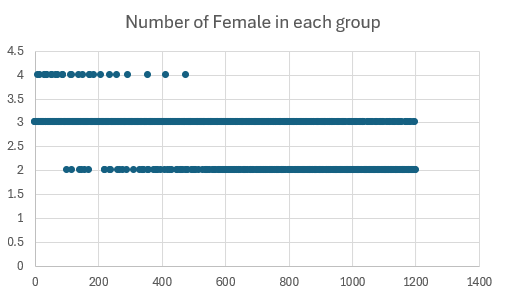
###
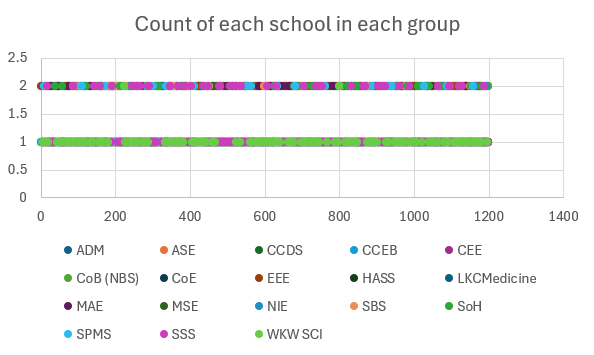
###
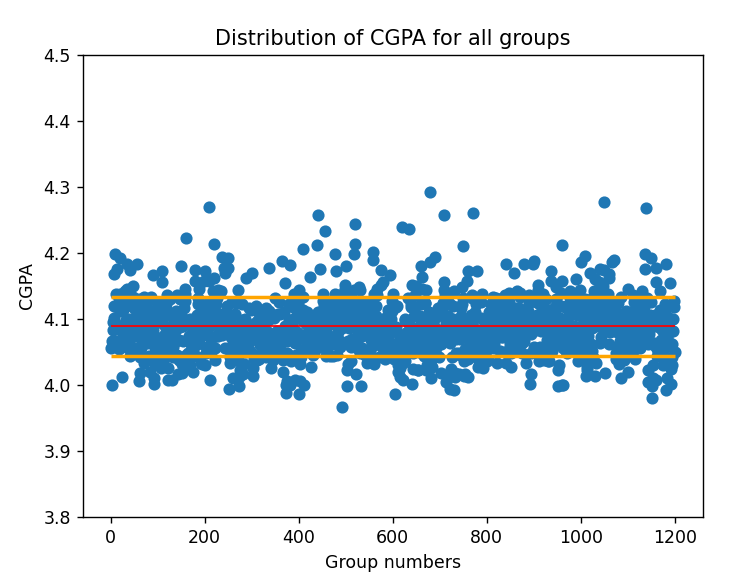

# Computational thinking

### Abstraction

Data Abstraction: Essential attributes of each student which are Tutorial Group, Student ID, School, Name, Gender, and CGPA are taken into account. 

Structural Abstraction: Simplifies the problem by defining lists and dictionaries to represent students and groups, storing each student’s data as a dictionary with keys ( ‘Tutorial Group’, ‘Student ID’, ‘School’, ‘Name’, ‘Gender’, ‘CGPA’). This makes it easier to access and process specific parts of data.

Functional Abstraction: We use functions like split_into_groups, check_balance and check_the_same_school to ensure that grouping, checking and balancing processes are clear and do not need to repeatedly write those codes, making the code more reusable and isolates logic into separate functions that can be called when needed.



### Decomposition

Reading Data : Our code first reads the data from the CSV file and stores it in a structured format in STUDENTS_LIST to ensure data is accessible ( list of dictionaries) for other operations and other steps can build on and rely on this.

Grouping by Tutorial : The split_into_groups function groups students by tutorial so that we can simplify the problem by looking at group by group. It breaks down the students into groups of 50 for each tutorial group and 10 teams in each group to achieve balanced and diverse teams.

Sorting: We use sorting functions like cgpa_groups and gender_groups to organize the students within each tutorial group, to make it easier to form balanced groups.

Balancing: We use check_balance and check_the_same_school functions to check for diversity in CGPA, gender and school within each team and this part only focuses on balance checks and does not overlap or interfere with the grouping and sorting codes.


Finally, the program saves the new organized data into a new CSV file so it is independent of the data processing aspect.



### Pattern Recognition

We identify students based on commonality such as tutorial groups and CGPA, genders and schools in this case so that we can store them using keys in a dictionary. 

To avoid a majority from one school or gender we make use of check_balance and check_the_same_school functions that lead to adjustments and ensure patterns of team composition are followed.

Our program uses the check_the_same_school function when an imbalance occurs to identify the problem pattern and reassign members across the groups.




### Algorithm Design + Evaluation

Shown above in each part of the algorithm


# Challenges Faced

1. Deciding which was the optimal order to sort the students

We had to try out and decide how to balance the teams most effectively and determine the correct order to apply the sorting. We realized that if we sort by gender first then school and CGPA will have a different outcome of students in a team from sorting by CGPA, gender and the schools. We tried out a few variations and compared the CGPA average and balance of the teams before deciding that sorting by CGPA first then gender and lastly by schools would provide us with the most optimal results.


2. Handling imbalanced tutorial groups

We decided to use the check_the_same_school function to see if any group has 3 or more students from the same school and in such a case will denote the team as imbalanced and looks at other teams within the tutorial group to find a suitable person to swap who is of different school than the over represented school in the team but of the same gender and similar CGPA.  After the swaping, the function re-evaluates to ensure balance in both the teams and no new issues are formed.


3. Ensuring code works out with the large data set of 6000 students

We had to ensure we recognised the patterns and make use of grouping and sorting and checking functions to ensure the program runs smoothly without needing to keep rewriting the code or making use of excessive checks which may increase duration of output and complicate the code. 


# Conclusion
To meet the requirements of our project and create teams which are well balanced and diverse in terms of schools, gender and CGPA we have created this algorithm that effectively divides the 6000 students into 120 tutorial groups and into groups of 5 students each. We made use of the computational thinking process principles – abstraction, decomposition, pattern recognition and algorithm design to ensure our code is readable and reusable and efficient. We have also tackled our challenges by testing out various methods and finding the most suited approach while ensuring that the groups are balanced using our check, balance functions. We have hence come up with this algorithm to address the project issue. 